In [ ]:
# Uncomment and run this cell if you're on Colab or Kaggle:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements(is_chapter2=True)

Cloning into 'notebooks'...
remote: Enumerating objects: 515, done.
remote: Counting objects: 100% (515/515), done.
remote: Compressing objects: 100% (278/278), done.
remote: Total 515 (delta 245), reused 478 (delta 231), pack-reused 0
Receiving objects: 100% (515/515), 29.39 MiB | 27.69 MiB/s, done.
Resolving deltas: 100% (245/245), done.
/content/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [ ]:
from utils import *
setup_chapter()

Using transformers v4.13.0
Using datasets v2.8.0


# Text Classification

## The Dataset

### A First Look at Hugging Face Datasets

In [ ]:
from datasets import list_datasets

all_datasets = list_datasets()
type(all_datasets)

list

In [ ]:
print(f"There are {len(all_datasets)} datasets currently available on the Hub.")
print(f"The first 10 are: {all_datasets[:10]}")

There are 25045 datasets currently available on the Hub.
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
from datasets import load_dataset

emotions = load_dataset("emotion")
type(emotions)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

datasets.dataset_dict.DatasetDict

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds = emotions['train']
type(train_ds)

datasets.arrow_dataset.Dataset

In [ ]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
type(train_ds[0])

dict

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

**Note:** There is no `'neutral'` class.

In [ ]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

**Note:** This is equivalent to using `.iloc` on a `DataFrame`.

In [ ]:
type(train_ds[:5])

dict

In [ ]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Alt:

In [ ]:
train_ds[:5]["text"]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [ ]:
type(train_ds["text"][:5])

list

### Sidebar: What If My Dataset Is Not on the Hub?

In [ ]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2023-03-18 07:50:51--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 54.156.223.8, 3.83.196.160, 54.86.197.110, ...
Connecting to huggingface.co (huggingface.co)|54.156.223.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  9.65MB/s    in 0.2s    

2023-03-18 07:50:51 (9.65 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [ ]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [ ]:
emotions_local = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])
emotions_local

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-4ff094339522a98f/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [ ]:
emotions_local['train'][0]

{'text': 'i didnt feel humiliated', 'label': 'sadness'}

In [ ]:
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";", names=["text", "label"])
emotions_remote

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-77d91d09868a1841/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

### End sidebar

### From Datasets to DataFrames

In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotions['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
df = emotions['train'][:]
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


Alt (and easier):

In [ ]:
df = emotions['train'].to_pandas()
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
# Reminder:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
emotions['train'].features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [ ]:
emotions['train'].features['label'].int2str

<bound method ClassLabel.int2str of ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)>

In other words, the `ClassLabel` object has a method called `int2str()`.

In [ ]:
type(emotions['train'].features['label'].int2str)

method

In [ ]:
emotions['train'].features['label'].int2str(0)

'sadness'

In [ ]:
def label_int2str(val):
    return emotions['train'].features['label'].int2str(val)

df['label_name'] = df['label'].map(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Alt:

In [ ]:
df['label_name'] = df['label'].map(emotions['train'].features['label'].int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking at the Class Distribution

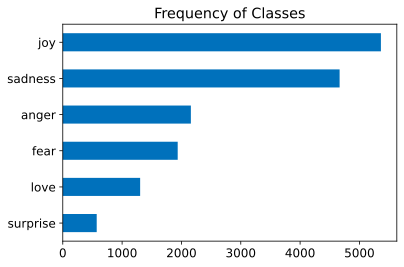

In [ ]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

**Note:** The point of this EDA is to check class imbalance, which informs decisions like (i) which metric to use, (ii) which loss function to use, (iii) whether to use oversampling/undersampling & (iv) whether to use class weights.

### How Long Are Our Tweets?

In [ ]:
df['text'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [ ]:
df['text'].head().str.split()

0                         [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, ...
2    [im, grabbing, a, minute, to, post, i, feel, g...
3    [i, am, ever, feeling, nostalgic, about, the, ...
4                            [i, am, feeling, grouchy]
Name: text, dtype: object

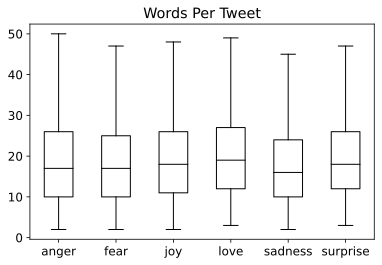

In [ ]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

**Note:** The point of this EDA is to check whether truncation is required when preprocessing the data.

In [ ]:
emotions.reset_format()

## From Text to Tokens

### Character Tokenization

In [ ]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
len(tokenized_text)

38

In [ ]:
print(set(tokenized_text))

{'x', 'e', 'c', '.', 's', 'a', 'T', 'i', 'L', 't', 'r', 'g', 'f', 'P', 'z', 'o',
' ', 'k', 'N', 'n'}


In [ ]:
print(sorted(set(tokenized_text)))

[' ', '.', 'L', 'N', 'P', 'T', 'a', 'c', 'e', 'f', 'g', 'i', 'k', 'n', 'o', 'r',
's', 't', 'x', 'z']


**Note:** Sorting a set with `sorted()` returns a list.

In [ ]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [ ]:
len(token2idx)

20

In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [ ]:
categorical_df = pd.DataFrame({'Name': ["Bumblebee", "Optimus Prime", "Megatron"], 'Label ID': [0, 1, 2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [ ]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


**Note:** The reason one-hot encodings are being mentioned here is to draw a rough analogy with token embeddings (which are used instead of one-hot encodings in Transformer-based models).

In [ ]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
input_ids.shape

torch.Size([38])

In [ ]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

First two characters:

In [ ]:
one_hot_encodings[:2]

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

First character:

In [ ]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word Tokenization

In [ ]:
text

'Tokenizing text is a core task of NLP.'

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Subword Tokenization

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
type(tokenizer)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast

In [ ]:
tokenizer.is_fast

True

In [ ]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
type(distilbert_tokenizer)

transformers.models.distilbert.tokenization_distilbert.DistilBertTokenizer

In [ ]:
distilbert_tokenizer.is_fast

False

In [ ]:
text

'Tokenizing text is a core task of NLP.'

In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


**Note:** This looks like a dictionary, but isn't a dictionary. It's a `BatchEncoding` object.

In [ ]:
type(encoded_text)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


Alt:

In [ ]:
tokens = encoded_text.tokens()
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [ ]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

Alt:

In [ ]:
tokenizer.decode(encoded_text['input_ids'])

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [ ]:
tokenizer.all_special_ids

[100, 102, 0, 101, 103]

### Tokenizing the Whole Dataset

In [ ]:
# Reminder:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

**Note:** When using the `Trainer` API, we needn't specify `padding=True` in our `tokenize()` function. This is because padding is performed by the data collator. Here, `padding=True` is being specified for two reasons:

1. The authors want to explain the concept of `"attention_mask"`.
2. We'll be calling `emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])`. For this step to yield rank 2 tensors (rather than lists of rank 1 tensors), all the input IDs and attention masks need to have the same length.

In [ ]:
emotions['train'][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [ ]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


**Note:** Notice the zeros that have been appended to `'input_ids'` and `'attention_mask'` for the first (shorter) example.

In [ ]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
tokens2ids

[('[UNK]', 100), ('[SEP]', 102), ('[PAD]', 0), ('[CLS]', 101), ('[MASK]', 103)]

In [ ]:
data = sorted(tokens2ids, key=lambda x: x[-1])
data

[('[PAD]', 0), ('[UNK]', 100), ('[CLS]', 101), ('[SEP]', 102), ('[MASK]', 103)]

Alt:

In [ ]:
import operator

data = sorted(tokens2ids, key=operator.itemgetter(-1))
data

[('[PAD]', 0), ('[UNK]', 100), ('[CLS]', 101), ('[SEP]', 102), ('[MASK]', 103)]

In [ ]:
df = pd.DataFrame(data, columns=['Special Token', 'Special Token ID'])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [ ]:
print(emotions_encoded['train'][:2])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake'], 'label':
[0, 0], 'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045,
2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108,
2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Training a Text Classifier

### Transformers as Feature Extractors

#### Using pretrained models

In [ ]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
type(model)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

transformers.models.distilbert.modeling_distilbert.DistilBertModel

### Sidebar: Interoperability Between Frameworks

In [ ]:
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)
type(tf_model)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

transformers.models.distilbert.modeling_tf_distilbert.TFDistilBertModel

In [ ]:
# tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")

In [ ]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

**Note:** Similarly, `AutoModel.from_pretrained()` has a `from_tf` parameter.

### End sidebar

#### Extracting the last hidden states

In [ ]:
text = "this is a test"

In [ ]:
# What we had earlier:
tokenizer(text)

{'input_ids': [101, 2023, 2003, 1037, 3231, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
# Now:
inputs = tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [ ]:
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [ ]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

This is equivalent to:

In [ ]:
outputs.last_hidden_state[:, 0, :].size()

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU:
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states:
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vectors for "[CLS]" token:
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [ ]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
print(emotions_encoded['train'][:2])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake'], 'label':
[0, 0], 'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045,
2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108,
2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Remember:** We've padded all the sequences globally (in the batch tokenization step). Hence, we can do the following:

In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
print(emotions_encoded['train'][:2])

{'label': tensor([0, 0]), 'input_ids': tensor([[  101,  1045,  2134,  2102,
2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
          9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  1998,
          2003,  8300,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [ ]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
print(emotions_hidden['train'][:2])

{'label': tensor([0, 0]), 'input_ids': tensor([[  101,  1045,  2134,  2102,
2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
          9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  1998,
          2003,  8300,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     

In [ ]:
type(emotions_hidden['train'][:2])

dict

**Note:** Even though `extract_hidden_states()` returns a dictionary containing a NumPy array, we still see **tensors** as the values of the above **dictionary**. (**Aside:** A slice of a `Dataset` is not a `BatchEncoding` object.) This is because we set the output format of the `Dataset` to `"torch"`.

In [ ]:
emotions_hidden['train']['hidden_state'].size()

torch.Size([16000, 768])

**Note:** Even though we used a batch size of 1,000 in the call to the `map()` method, the output tensors have a batch size of 16,000. This is because `emotions_hidden['train']` is a `Dataset`, not a `DataLoader`.

#### Creating a feature matrix

In [ ]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
X_train.shape, y_train.shape

((16000, 768), (16000,))

In [ ]:
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_valid.shape, y_valid.shape

((2000, 768), (2000,))

#### Visualizing the training set

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0, 1] range:
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize and fit UMAP:
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Create a DataFrame of 2D embeddings:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.634256,6.607656,0
1,-2.672800,6.040825,0
2,5.814406,3.016054,3
3,-1.927805,3.939954,2
4,-3.008550,3.877168,3


In [ ]:
labels = emotions['train'].features['label'].names
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

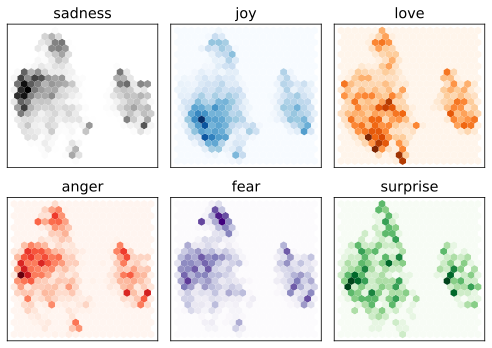

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

#### Training a simple classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

**Note:** We see that `sklearn.linear_model.LogisticRegression` can be used for multiclass classification (not just for binary classification). Under the hood, it probably uses a one-vs-rest strategy.

In [ ]:
lr_clf.score(X_valid, y_valid)

0.633

Alt:

In [ ]:
from sklearn.metrics import accuracy_score

y_preds = lr_clf.predict(X_valid)
accuracy_score(y_valid, y_preds)

0.633

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [ ]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
?confusion_matrix

From the <a href="" target="_blank">docs</a>:

> `normalize : {'true', 'pred', 'all'}`, default=`None`

> Normalizes confusion matrix over the true (rows, i.e., `axis=1`), predicted (columns, i.e., `axis=0`) conditions or all the population. If `None`, confusion matrix will not be normalized.

In [ ]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [ ]:
y_preds = lr_clf.predict(X_valid)
y_preds

array([0, 0, 2, ..., 1, 1, 1])

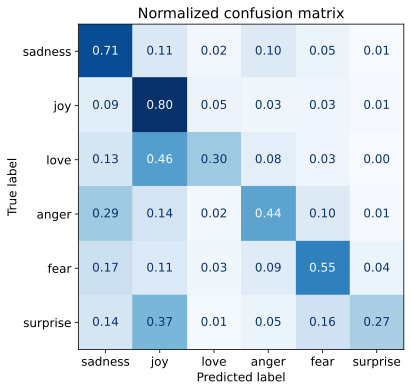

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

**Note:** You can use the above function in your own notebooks.

### Fine-Tuning Transformers

#### Loading a pretrained model

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

#### Defining the performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
help(f1_score)

Help on function f1_score in module sklearn.metrics._classification:

f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the F1 score, also known as balanced F-score or F-measure.
    
    The F1 score can be interpreted as a harmonic mean of the precision and
    recall, where an F1 score reaches its best value at 1 and worst score at 0.
    The relative contribution of precision and recall to the F1 score are
    equal. The formula for the F1 score is::
    
        F1 = 2 * (precision * recall) / (precision + recall)
    
    In the multi-class and multi-label case, this is the average of
    the F1 score of each class with weighting depending on the ``average``
    parameter.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    

#### Training the model

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

In [ ]:
from transformers import TrainingArguments, Trainer

batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    log_level="error",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded['train'],
    eval_dataset=emotions_encoded['validation'],
    tokenizer=tokenizer
)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.814500,0.314162,0.906500,0.903242
2,0.246500,0.213700,0.923500,0.923545


In [ ]:
preds_output = trainer.predict(emotions_encoded['validation'])
type(preds_output)

transformers.trainer_utils.PredictionOutput

In [ ]:
preds_output.metrics

{'test_loss': 0.2137000411748886,
 'test_accuracy': 0.9235,
 'test_f1': 0.923544576573346,
 'test_runtime': 4.5653,
 'test_samples_per_second': 438.089,
 'test_steps_per_second': 7.009}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

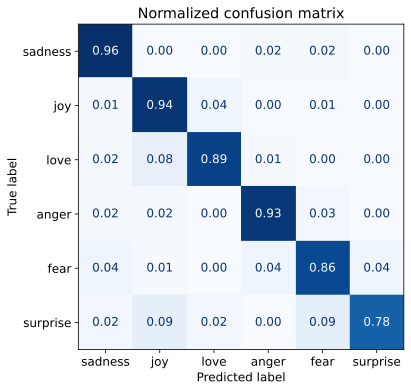

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

### Sidebar: Fine-Tuning with Keras

In [ ]:
# from transformers import TFAutoModelForSequenceClassification

# tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

In [ ]:
# The column names to convert to TensorFlow tensors:
# tokenizer_columns = tokenizer.model_input_names

# tf_train_dataset = emotions_encoded["train"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"], shuffle=True, batch_size=batch_size)
# tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(columns=tokenizer_columns, label_cols=["label"], shuffle=False, batch_size=batch_size)

In [ ]:
# import tensorflow as tf

# tf_model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=tf.metrics.SparseCategoricalAccuracy()
# )

# tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

### End sidebar

#### Error analysis

In [ ]:
from torch.nn.functional import cross_entropy

**Remember:** `cross_entropy()` is a combination of log-softmax and negative log likelihood loss. It takes the raw logits & integer labels as inputs.

In [ ]:
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model:
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction="none")

    # Place outputs on CPU for compatibility with other `Dataset` columns:
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [ ]:
# The below line will only work if you've applied global padding.
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, batched=True, batch_size=16)
emotions_encoded

  0%|          | 0/125 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
emotions_encoded.set_format("pandas")
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,0,0,0.020534
1,i feel like i am still looking at a blank canv...,0,0,0.027202
2,i feel like a faithful servant,2,2,0.439325
3,i am just feeling cranky and blue,3,3,0.036104
4,i can have for a treat or if i am feeling festive,1,1,0.018268


In [ ]:
df_test['label'] = df_test['label'].map(label_int2str)
df_test['predicted_label'] = df_test['predicted_label'].map(label_int2str)
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.020534
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.027202
2,i feel like a faithful servant,love,love,0.439325
3,i am just feeling cranky and blue,anger,anger,0.036104
4,i can have for a treat or if i am feeling festive,joy,joy,0.018268


In [ ]:
pd.set_option('display.max_colwidth', 0)

In [ ]:
df_test.sort_values(by='loss', ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong with corporate america and feel that sending him to washington is a ludicrous idea,surprise,sadness,5.965655
1801,i feel that he was being overshadowed by the supporting characters,love,sadness,5.354413
882,i feel badly about reneging on my commitment to bring donuts to the faithful at holy family catholic church in columbus ohio,love,sadness,5.240198
1963,i called myself pro life and voted for perry without knowing this information i would feel betrayed but moreover i would feel that i had betrayed god by supporting a man who mandated a barely year old vaccine for little girls putting them in danger to financially support people close to him,joy,sadness,5.227668
1111,im lazy my characters fall into categories of smug and or blas people and their foils people who feel inconvenienced by smug and or blas people,joy,fear,5.018820
318,i felt ashamed of these feelings and was scared because i knew that something wrong with me and thought i might be gay,fear,sadness,4.970858
1870,i guess i feel betrayed because i admired him so much and for someone to do this to his wife and kids just goes beyond the pale,joy,sadness,4.883635
1500,i guess we would naturally feel a sense of loneliness even the people who said unkind things to you might be missed,anger,sadness,4.863689
1509,i guess this is a memoir so it feels like that should be fine too except i dont know something about such a deep amount of self absorption made me feel uncomfortable,joy,fear,4.390889
1683,i had applied for a job and they had assured me that the exams would take place a few months later a week later i went to obtain some more information and they told me that the exams had already taken place,anger,joy,4.345560


In [ ]:
df_test.sort_values(by='loss', ascending=True).head(10)

,text,label,predicted_label,loss
845,i already feel very glamorous have a great day everybody,joy,joy,0.016919
1873,i feel practically virtuous this month i have not exceeded my target of only buying things,joy,joy,0.017034
1090,i dont know what it is about me and sweets they make me feel bouncy and pleased with everything,joy,joy,0.017137
1368,i started this blog with pure intentions i must confess to starting to feel a little disheartened lately by the knowledge that there doesnt seem to be anybody reading it,sadness,sadness,0.017250
69,i have no extra money im worried all of the time and i feel so beyond pathetic,sadness,sadness,0.017283
632,i feel he is an terrific really worth bet,joy,joy,0.017360
1601,i feel so ungrateful when thinking saying these things but im not sure how to make myself better,sadness,sadness,0.017477
1140,i do think about certain people i feel a bit disheartened about how things have turned out between them it all seems shallow and really just plain bitchy,sadness,sadness,0.017489
133,i and feel quite ungrateful for it but i m looking forward to summer and warmth and light nights,sadness,sadness,0.017626
669,i am not feeling very joyful today its been a rough day,joy,joy,0.017636


#### Saving and sharing the model

In [ ]:
# trainer.push_to_hub(commit_message="Training completed!")

In [ ]:
from transformers import pipeline

# Change 'transformersbook' to your Hub username:
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'sadness', 'score': 0.009574254974722862},
  {'label': 'joy', 'score': 0.9667787551879883},
  {'label': 'love', 'score': 0.010558933950960636},
  {'label': 'anger', 'score': 0.0050274343229830265},
  {'label': 'fear', 'score': 0.003563669277355075},
  {'label': 'surprise', 'score': 0.004497055429965258}]]

In [ ]:
preds_df = pd.DataFrame(preds[0])
preds_df

,label,score
0,sadness,0.009574
1,joy,0.966779
2,love,0.010559
3,anger,0.005027
4,fear,0.003564
5,surprise,0.004497


In [ ]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

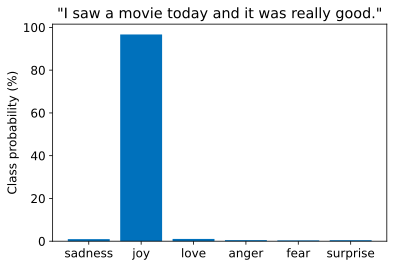

In [ ]:
plt.bar(labels, 100 * preds_df['score'], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

## Conclusion